# TD 1 - Computational Statistics - MVA 23-24
## Meilame TAYEBJEE - Groupe 2

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler

### Algorithme du gradient stochastique

In [2]:
def stochasticGradientDescent(X, y, w_init = np.random.randint(-5, 5, size = 2), stop = 0.1, nb_iter_max = 200):
    n, p = np.shape(X)
    
    w = w_init.reshape((1, p))
    w_prev = np.ones((1, p))*np.inf
    iter = 1
    losses = []
    objs = []
    grad = np.ones((n,1))*np.inf
    while (np.sum(np.abs(grad)) > stop) and (iter < nb_iter_max): # critère d'arrêt : norme 1 du gradient proche de 0 ou nombre d'itérations max
        i = np.random.randint(0, n) # tirage aléatoire d'un indice
        y_pred = X[i, :]@w.T # calcul de la prédiction pour cet indice
        w_prev = w 
        w = w - 2*(y_pred - y[i])*X[i, :]/iter
        iter += 1
        grad = y - X@w.T      # calcul du gradient ; on le fait ici à chaque itération, on peut le faire moins souvent
        losses.append(np.mean(grad))
        objs.append(np.mean(grad**2))

    return w, losses, objs

### Points linéairement séparables

On génère ici 1000 points de $\mathbb{R}^2. On considère le vecteur $w_0 = (-1, 1)$ et on définit deux classes - en fonction du signe de $w_0^T x_i$ -  parfaitement séparées par la droite $w_0^T x = 0$.

En-dessous du plot figure également la valeur $R_n(w_0)$.

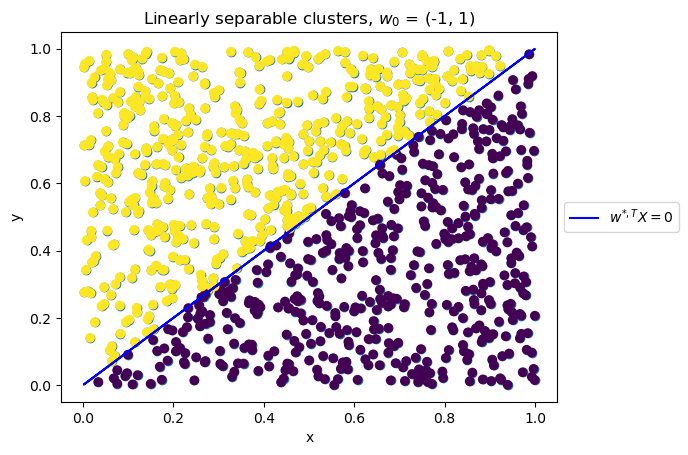

$R_n(w_0)$ =  0.495


In [121]:
n = 1000 # nombre de points
p = 2


X = np.random.rand(n, p)

w_true = np.array([-1, 1]).reshape(1, p) #On fixe w = (-1, 1) arbitrairement

y_true = np.sign(X @ w_true.T)

line = - w_true[0, 0]*X[:, 0]/w_true[0, 1] # On trace la droite séparatrice, d'équation w_0*x + w_1*y = 0 ie y = x

plt.plot(X[:, 0], line, 'b', label = r"$w^{*,T}X = 0$")

plt.scatter(X[:, 0], X[:, 1])


plt.scatter(X[:, 0], X[:, 1], c = y_true)
plt.title('Linearly separable clusters, $w_0$ = (-1, 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

val_func = np.mean((y_true - X @ w_true.T)**2)
print(r"$R_n(w_0)$ = ", round(val_func, 3))


The predicted weights w^* are :  [[-2.24201839  2.25378996]] while the true weights w_0 are :  [[-1  1]]
The number of misclassified points is :  7 over  1000 points
Final objective value R_n(w^*)=  0.36


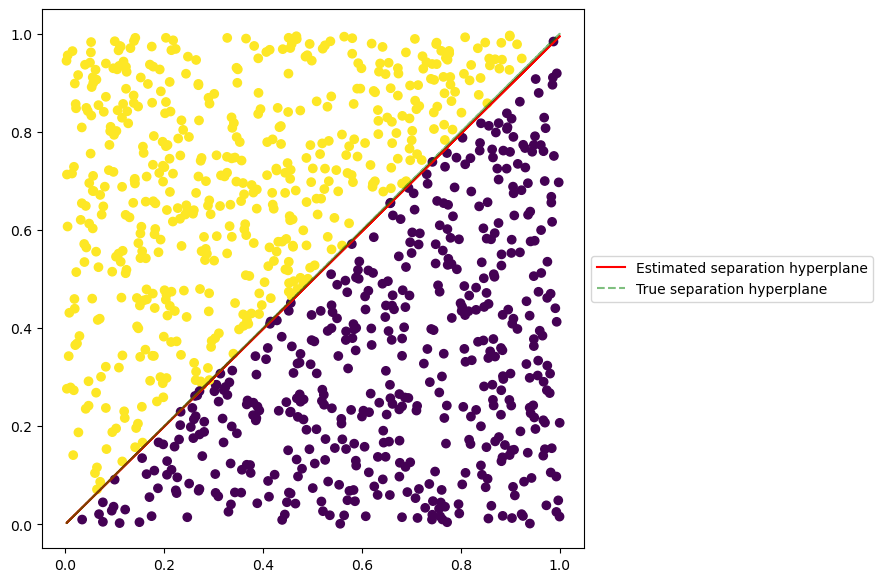

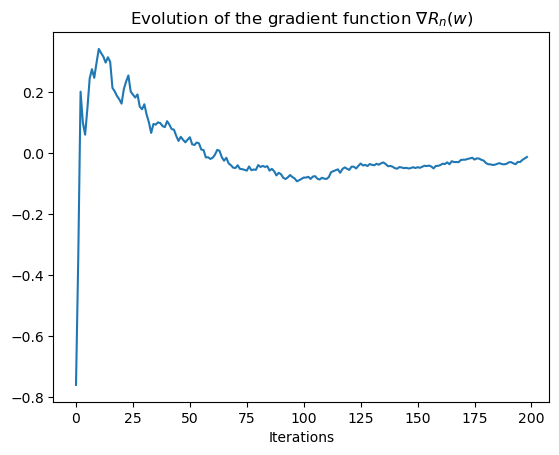

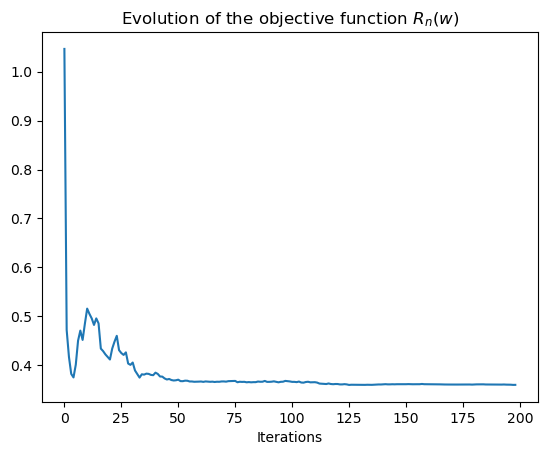

In [140]:
w_pred, losses, objs = stochasticGradientDescent(X, y_true) #On lance l'algorithme

line = - w_true[0, 0]*X[:, 0]/w_true[0, 1]
line_pred = - w_pred[0, 0]*X[:, 0]/w_pred[0, 1]

y_pred = np.sign(X @ w_pred.T)
num_false = np.sum(y_pred != y_true)

print("The predicted weights w^* are : ", w_pred, "while the true weights w_0 are : ", w_true)
print("The number of misclassified points is : ", num_false, "over ", n, "points")
print("Final objective value R_n(w^*)= ", round(objs[-1], 3))

plt.figure(figsize = (7, 7))
plt.plot(X[:, 0], line_pred, 'r', label = 'Estimated separation hyperplane')
plt.plot(X[:, 0], line, 'g', linestyle="--", alpha = 0.5, label = 'True separation hyperplane')
plt.scatter(X[:, 0], X[:, 1], c = y_true)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.title(r'Evolution of the gradient function $\nabla R_n(w)$')
plt.plot(losses)
plt.xlabel('Iterations')
plt.show()

plt.title('Evolution of the objective function $R_n(w)$')
plt.plot(objs)
plt.xlabel('Iterations')
plt.show()


Dans cette situation, l'algorithme du gradient stochastique, avec 200 itérations, approche très bien le vecteur $w_0$ (il renvoie $ w^* \approx 2w_0$, un vecteur colinéaire qui garde le même hyerplan séparateur).
On note les performances du classifieur obtenu avec seulement 7 points mal classifiés (moins d'1% du total).

Cependant, malgré les erreurs de classification, on a $R_n(w^*) < R_n(w_0)$ : $w_0$ minimise $\frac{1}{n}\sum{(y_i - sgn(w^T x_i))}$ (dont la valeur est 0 en $w_0$) mais pas $R_n$, qui en est une version convexifiée.

### Bruitage : "overlapping clusters"

On garde toujours les mêmes points et le même $w_0 = (-1, 1)$, mais on ajoute un bruit gaussien aux coordonnées des points (on les fait bouger).
On fait apparaître le nombre de points mal classifiés si on prédit $w^* = w_0$.

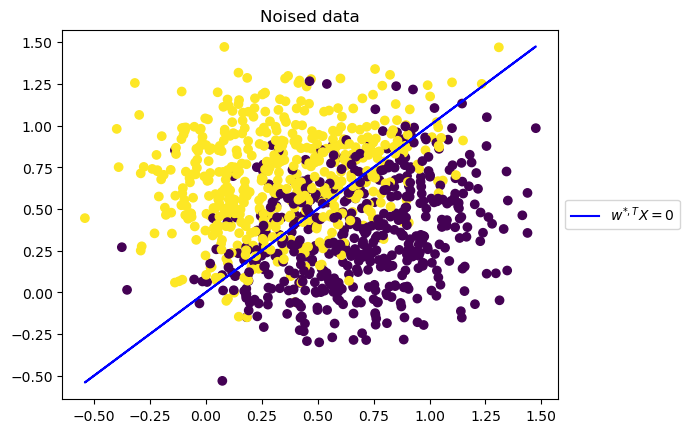

$R_n(w_0)$ =  0.58
The number of misclassified points at w = w_0 is :  195 over  1000 points


In [141]:
sigma = 0.2 #Standard deviation of the noise

for i in range(n):
    X_noised = X + np.random.normal(0, sigma, (n, p))

line = - w_true[0, 0]*X_noised[:, 0]/w_true[0, 1]
plt.title("Noised data")
plt.scatter(X_noised[:, 0], X_noised[:, 1], c = y_true)
plt.plot(X_noised[:, 0], line, 'b', label = r"$w^{*,T}X = 0$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


val_func = np.mean((y_true - X_noised @ w_true.T)**2)
print(r"$R_n(w_0)$ = ", round(val_func, 3))

y_pred = np.sign(X_noised @ w_true.T)
num_false = np.sum(y_pred != y_true)
print("The number of misclassified points at w = w_0 is : ", num_false, "over ", n, "points")

The predicted weights w^* are :  [[-2.06825897  1.94135036]] while the true weights w_0 are :  [[-1  1]]
The number of misclassified points is :  195 over  1000 points
Final objective value R_n(w^*)=  0.697


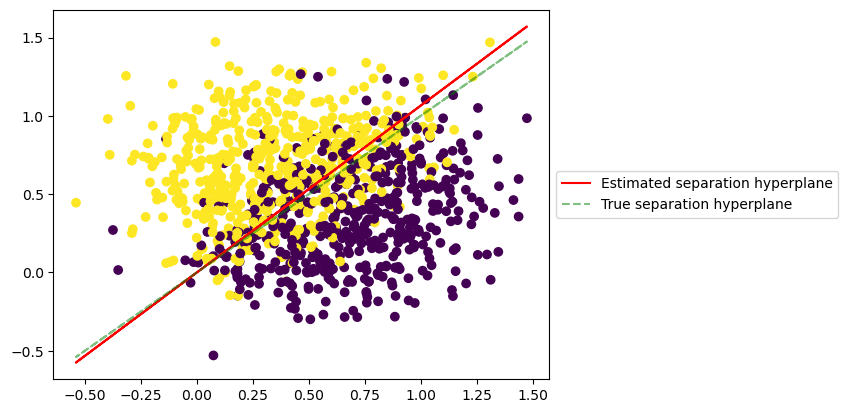

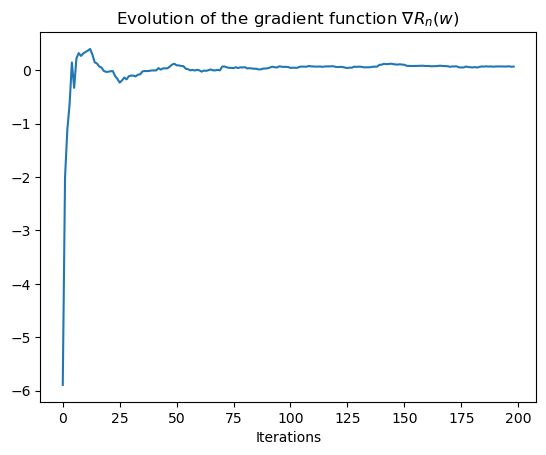

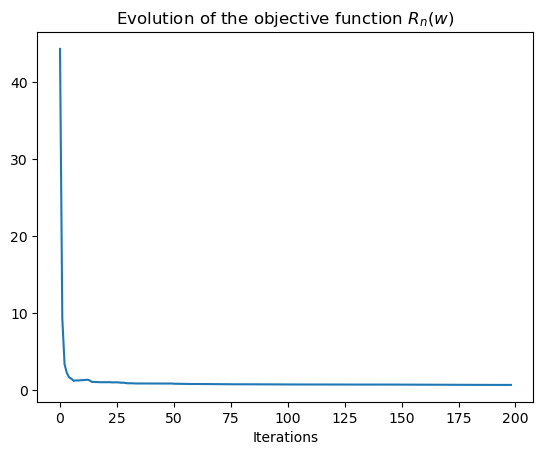

In [154]:
w_pred, losses, objs = stochasticGradientDescent(X_noised, y_true, np.array([10, 10])) #On lance l'algorithme

line = - w_true[0, 0]*X_noised[:, 0]/w_true[0, 1]
line_pred = - w_pred[0, 0]*X_noised[:, 0]/w_pred[0, 1]

y_pred = np.sign(X_noised @ w_pred.T)
num_false = np.sum(y_pred != y_true)

print("The predicted weights w^* are : ", w_pred, "while the true weights w_0 are : ", w_true)
print("The number of misclassified points is : ", num_false, "over ", n, "points")
print("Final objective value R_n(w^*)= ", round(objs[-1], 3))

plt.plot(X_noised[:, 0], line_pred, 'r', label = 'Estimated separation hyperplane')
plt.plot(X_noised[:, 0], line, 'g', linestyle="--", alpha = 0.5, label = 'True separation hyperplane')
plt.scatter(X_noised[:, 0], X_noised[:, 1], c = y_true)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.title(r'Evolution of the gradient function $\nabla R_n(w)$')
plt.plot(losses)
plt.xlabel('Iterations')
plt.show()

plt.title('Evolution of the objective function $R_n(w)$')
plt.plot(objs)
plt.xlabel('Iterations')
plt.show()


On remarque que $w^*$ approche toujours une version colinéaire de $w_0$. En terme de classification il performe  aussi bien que $w_0$.

En revanche, on note que cette fois $R_n(w^*) > R_n(w_0)$ : à cause du bruit, 200 itérations ne suffisent plus à atteindre le minimum de $R_n$. Ci-après, on essaie d'augmenter le nombre itérations à 1000.

The predicted weights w^* are :  [[-1.17444677  1.19064897]] while the true weights w_0 are :  [[-1  1]]
The number of misclassified points is :  192 over  1000 points
Final objective value R_n(w^*)=  0.56


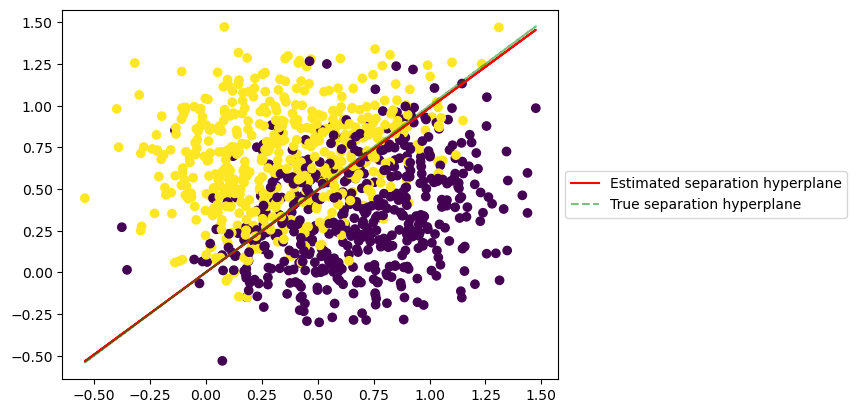

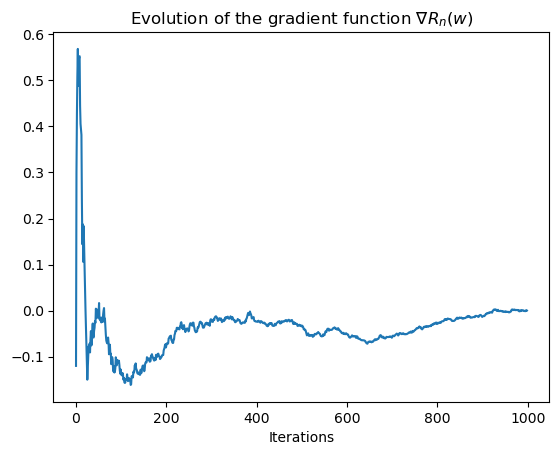

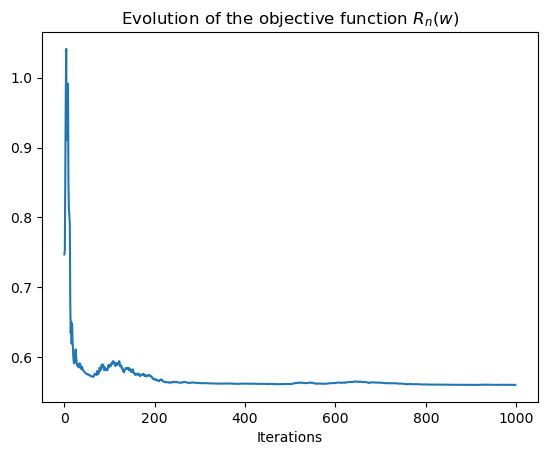

In [171]:
w_pred, losses, objs = stochasticGradientDescent(X_noised, y_true, np.array([10, 10]), nb_iter_max= 1000) #On lance l'algorithme avec plus d'itérations

line = - w_true[0, 0]*X_noised[:, 0]/w_true[0, 1]
line_pred = - w_pred[0, 0]*X_noised[:, 0]/w_pred[0, 1]

y_pred = np.sign(X_noised @ w_pred.T)
num_false = np.sum(y_pred != y_true)

print("The predicted weights w^* are : ", w_pred, "while the true weights w_0 are : ", w_true)
print("The number of misclassified points is : ", num_false, "over ", n, "points")
print("Final objective value R_n(w^*)= ", round(objs[-1], 3))

plt.plot(X_noised[:, 0], line_pred, 'r', label = 'Estimated separation hyperplane')
plt.plot(X_noised[:, 0], line, 'g', linestyle="--", alpha = 0.5, label = 'True separation hyperplane')
plt.scatter(X_noised[:, 0], X_noised[:, 1], c = y_true)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.title(r'Evolution of the gradient function $\nabla R_n(w)$')
plt.plot(losses)
plt.xlabel('Iterations')
plt.show()

plt.title('Evolution of the objective function $R_n(w)$')
plt.plot(objs)
plt.xlabel('Iterations')
plt.show()

Avec 5 fois plus d'itérations, sans surprise, $w^*$ performe mieux tant en terme de minimisation de $R_n$ que de classification.


### Dataset Breast Cancer Wisconsin

In [3]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  

X = np.array(breast_cancer_wisconsin_diagnostic.data.features).astype(float)
y = np.array(breast_cancer_wisconsin_diagnostic.data.targets)


y[y == 'M'] = -1
y[y == 'B'] = 1

X = StandardScaler().fit_transform(X) #On normalise les données
y = y.astype(int)

n, p = X.shape

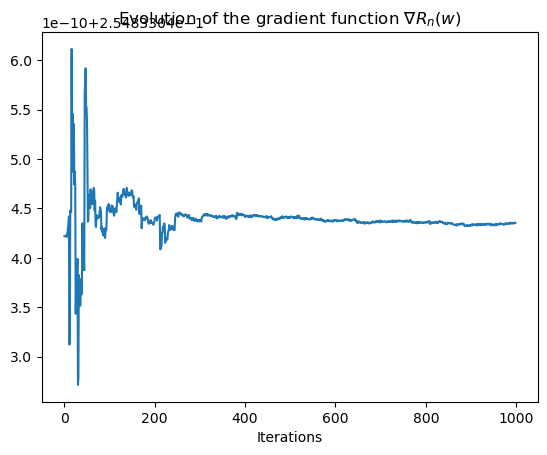

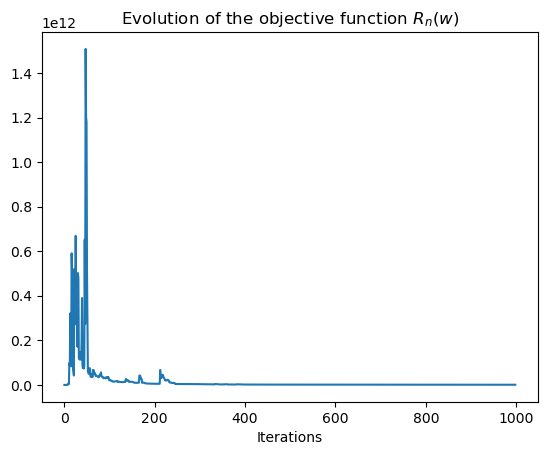

The number of misclassified points is :  211 over  569 points
Percentage of misclassified points :  37.08 %


In [189]:
w, losses, objs = stochasticGradientDescent(np.array(X), np.array(y), np.ones((1, 30)), nb_iter_max= 1000) #On lance l'algorithme du gradient stochastique avec 1000 itérations

plt.title(r'Evolution of the gradient function $\nabla R_n(w)$')
plt.plot(losses)
plt.xlabel('Iterations')
plt.show()

plt.title('Evolution of the objective function $R_n(w)$')
plt.plot(objs)
plt.xlabel('Iterations')
plt.show()

y_pred = np.sign(X @ w.T)
num_false = np.sum(y_pred != y)
print("The number of misclassified points is : ", num_false, "over ", n, "points")
print("Percentage of misclassified points : ", round(num_false/n*100, 2), "%")

L'algorithme converge, mais les performances du classifieur laissent à désirer avec 37% des points mal classifiés, ce qui est à peine mieux qu'un classifieur naïf qui prédirait 1 pour tout le monde... (voir cellule suivante). Selon toute vraisemblance, les deux classes ne sont pas linéairement séparables.

In [16]:
y_pred = np.ones((n, 1)) #On prédit toujours 1
num_false = np.sum(y_pred != y)
print("The number of misclassified points is : ", num_false, "over ", n, "points")
print("Percentage of misclassified points : ", round(num_false/n*100, 2), "%")

0.6274165202108963
The number of misclassified points is :  263 over  569 points
Percentage of misclassified points :  46.22 %
